Monte Carlo with 100 trials: Probability = 0.060000
Monte Carlo with 1000 trials: Probability = 0.078000
Monte Carlo with 10000 trials: Probability = 0.088200
Monte Carlo with 50000 trials: Probability = 0.082040
Monte Carlo with 100000 trials: Probability = 0.082750

Exact probability: 0.083333


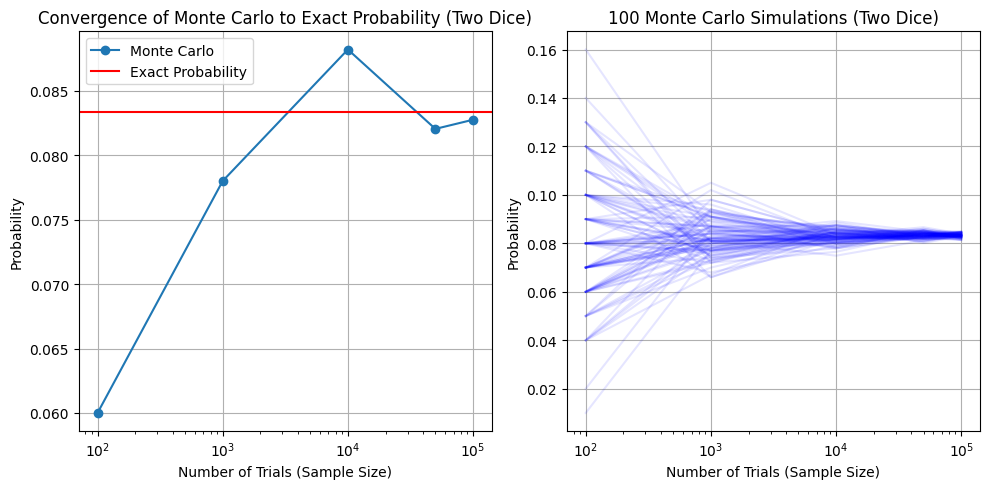

In [1]:
import random
import matplotlib.pyplot as plt

def monte_carlo_dice(num_trials):
    """
    Performs the Monte Carlo simulation for the two-dice problem.

    Args:
        num_trials: The number of trials to run in the simulation.

    Returns:
        The estimated probability that the sum of two dice is less than 4.
    """
    successful_trials = 0
    for _ in range(num_trials):
        # Simulate rolling two dice
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)

        # Check if the sum is less than 4
        if die1 + die2 < 4:
            successful_trials += 1

    return successful_trials / num_trials

def exact_probability_dice():
    """
    Calculates the exact probability of the sum of two dice being less than 4.

    Returns:
        The exact probability.
    """
    favorable_outcomes = 0
    total_outcomes = 36  # 6 possible outcomes for each die (6 * 6 = 36)

    # Count the favorable outcomes (sums less than 4)
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j < 4:
                favorable_outcomes += 1

    return favorable_outcomes / total_outcomes

# --- First Plot: Convergence of Monte Carlo to Exact Probability ---
sample_sizes = [100, 1000, 10000, 50000, 100000]
mc_probabilities = []

for size in sample_sizes:
    prob = monte_carlo_dice(size)
    mc_probabilities.append(prob)
    print(f"Monte Carlo with {size} trials: Probability = {prob:.6f}")

exact_prob = exact_probability_dice()
print(f"\nExact probability: {exact_prob:.6f}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, mc_probabilities, marker='o', label='Monte Carlo')
plt.axhline(y=exact_prob, color='r', linestyle='-', label='Exact Probability')
plt.xscale('log')
plt.xlabel('Number of Trials (Sample Size)')
plt.ylabel('Probability')
plt.title('Convergence of Monte Carlo to Exact Probability (Two Dice)')
plt.legend()
plt.grid(True)

# --- Second Plot: 100 Monte Carlo Simulations ---
plt.subplot(1, 2, 2)
num_simulations = 100
for _ in range(num_simulations):
    mc_probabilities = []
    for size in sample_sizes:
        prob = monte_carlo_dice(size)
        mc_probabilities.append(prob)
    plt.plot(sample_sizes, mc_probabilities, color='blue', alpha=0.1)

plt.xscale('log')
plt.xlabel('Number of Trials (Sample Size)')
plt.ylabel('Probability')
plt.title('100 Monte Carlo Simulations (Two Dice)')
plt.grid(True)

plt.tight_layout()
plt.show()